Ad:Cudi
Soyad:Şami
Okul Numarası:2012721308
GitHub Repo Bağlantısı:https://github.com/cudi33/CNN_siniflandirma-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/dataset"
print(os.listdir(dataset_path))


['kaşık', 'çatal', 'bıçak']


## 📁 Veri Setinin Yüklenmesi

Bu adımda Google Drive bağlanarak veri setinin bulunduğu klasöre erişilmiştir.  
Veri seti üç sınıftan oluşmaktadır:

- Kaşık
- Çatal
- Bıçak

Klasör yapısı, Keras `flow_from_directory` fonksiyonu ile uyumlu olacak şekilde düzenlenmiştir.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt


## 📦 Kullanılan Kütüphaneler

Bu projede derin öğrenme modeli geliştirmek için aşağıdaki kütüphaneler kullanılmıştır:

- TensorFlow / Keras: Model oluşturma ve eğitme
- ImageDataGenerator: Görüntü ön işleme
- Matplotlib: Eğitim sonuçlarının görselleştirilmesi


In [ ]:
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


## ⚙️ Veri Ön İşleme

Görüntüler modele verilmeden önce normalize edilmiştir.  
Piksel değerleri 0–255 aralığından 0–1 aralığına çekilmiştir.

Veri seti:
- %80 eğitim
- %20 doğrulama

olarak bölünmüştür.


In [ ]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 173 images belonging to 3 classes.


## 🏋️‍♂️ Eğitim Verisi

Bu adımda eğitim verileri klasör yapısından otomatik olarak okunmuştur.  
Problem çok sınıflı olduğu için `categorical` sınıf modu kullanılmıştır.


In [ ]:
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 42 images belonging to 3 classes.


## ✅ Doğrulama Verisi

Modelin genelleme başarısını ölçmek için doğrulama verisi kullanılmıştır.


In [ ]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## 🧠 Transfer Learning – VGG16

Bu modelde ImageNet veri seti üzerinde önceden eğitilmiş VGG16 mimarisi kullanılmıştır.  
Üst sınıflandırma katmanları çıkarılarak problemimize uygun hale getirilmiştir.


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


## ❄️ Katmanların Dondurulması

VGG16’nın önceden öğrenilmiş ağırlıklarının bozulmaması için tüm katmanlar dondurulmuştur.


In [ ]:
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(3, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)


## 🏗️ Özel Sınıflandırma Katmanları

VGG16 üzerine problemimize özel tam bağlantılı katmanlar eklenmiştir.  
Dropout kullanılarak overfitting azaltılmıştır.


In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## ⚙️ Model Derleme

Model Adam optimizasyon algoritması ile derlenmiştir.  
Başarı metriği olarak accuracy kullanılmıştır.


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 169s 27s/step - accuracy: 0.2984 - loss: 1.3799 - val_accuracy: 0.4762 - val_loss: 0.9528
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4848 - loss: 1.0781 - val_accuracy: 0.8095 - val_loss: 0.7345
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6711 - loss: 0.7756 - val_accuracy: 0.7619 - val_loss: 0.6046
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7617 - loss: 0.6076 - val_accuracy: 0.8333 - val_loss: 0.5427
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8071 - loss: 0.5093 - val_accuracy: 0.8333 - val_loss: 0.4824
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8635 - loss: 0.4233 - val_accuracy: 0.8095 - val_loss: 0.4545
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9010 - loss: 0.3185 - val_accuracy: 0.8810 - val_loss: 0.4152
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9115 - loss: 0.3252 - val_accuracy: 0.8571 - val_loss: 0.3898
Epoch 

## 🏋️ Model Eğitimi

Model 10 epoch boyunca eğitilmiştir.  
Eğitim sırasında doğrulama verisi ile performans takip edilmiştir.


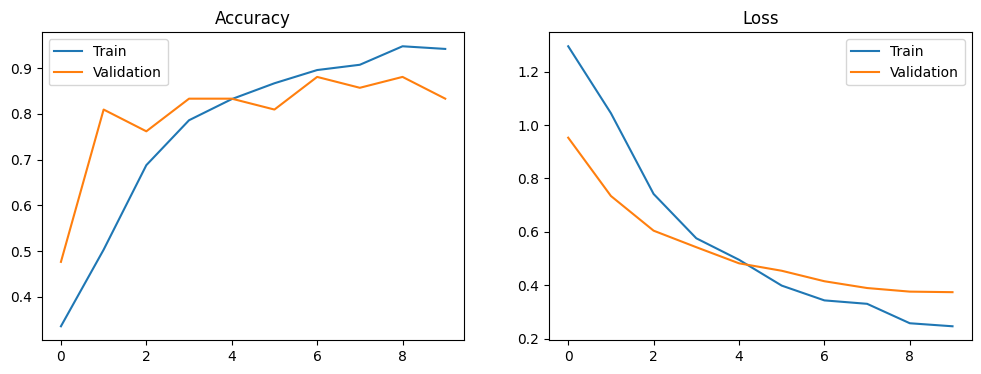

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


## 📊 Eğitim Sonuçları

Grafikler incelendiğinde modelin düzenli şekilde öğrendiği ve doğrulama başarısının tatmin edici olduğu görülmektedir.


Bu çalışmada ImageNet veri kümesi üzerinde önceden eğitilmiş VGG16 modeli
transfer learning yaklaşımıyla kullanılmıştır.

Modelin evrişimsel katmanları dondurulmuş ve yalnızca sınıflandırma katmanları
yeniden eğitilmiştir. Eğitim ve doğrulama doğrulukları incelendiğinde modelin
iyi bir genelleme performansı gösterdiği görülmektedir.

Doğrulama doğruluğu ile eğitim doğruluğu arasındaki fark sınırlı olup,
ciddi bir overfitting problemi gözlemlenmemiştir.
